In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold

In [2]:
boston = load_boston()
print(boston.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [108]:
X, t = load_boston(return_X_y=True)
X = np.array(X)
t = np.array(t)
from sklearn.model_selection import train_test_split
X_train,X_test,t_train,t_test=train_test_split(X,t,test_size=1/5,random_state=1862)
lenx = len(X_train)
lenxt = len(X_test)
new_col = np.ones(lenx)
new_col1 = np.ones(lenxt)
X_train = np.insert(X_train,0,new_col,axis=1)
X_test = np.insert(X_test,0,new_col1,axis=1)

In [109]:
def test_error_S(num_of_features,array_of_features):#returns the score of the feature aka the cross validation error
    X_trainS= np.ones((lenx,num_of_features+1))
    X_testS = np.ones((lenxt,num_of_features+1))
    
    for i in range(lenx):#replace the 1s with the actual predictor variable X values
        for j in range(len(array_of_features)):
            X_trainS[i,j+1] = X_train[i,array_of_features[j]]
            
    for k in range(lenxt):#replace the 1s with the actual predictor variable X values
        for l in range(len(array_of_features)):      
            X_testS[k,l+1] = X_test[k,array_of_features[l]]

    test_error = 0
    w = np.matmul(np.linalg.inv((np.matmul(np.transpose(X_trainS),X_trainS))),(np.matmul(np.transpose(X_trainS),t_train)))#finds the w parameter vector
    y_train= (np.matmul(np.transpose(w),np.transpose(X_trainS)))#equation to solve for the y training predictor
    train_error = (1/((N+1))) * np.matmul(np.transpose(y_train-t_train),(y_train-t_train))#solves for the training error
    y_test = np.matmul(w,np.transpose(X_testS))#finds the prediction y for the test data
    test_error = test_error + ((1/(num_of_features))*(np.dot((y_test-t_test)**2,np.transpose((y_test-t_test)**2))))#solves for the test error       
       
    
    print(test_error)#prints the average test error
    return test_error

In [110]:
# split data into training and test sets
from sklearn.model_selection import train_test_split
kf = KFold(n_splits=5)
print(kf.get_n_splits(X))
print(KFold(n_splits=5, random_state=1862, shuffle=False))
i=1
for train_index, test_index in kf.split(X):#split the data into 5 different folds
    if (i==1):
        X_train1, X_test1 = X[train_index], X[test_index]
        t_train1, t_test1 = t[train_index], t[test_index]
        i= i + 1
    elif (i==2):
        X_train2, X_test2 = X[train_index], X[test_index]
        t_train2, t_test2 = t[train_index], t[test_index]
        i= i + 1
    elif (i==3):
        X_train3, X_test3 = X[train_index], X[test_index]
        t_train3, t_test3 = t[train_index], t[test_index]
        i= i + 1
    elif (i==4):
        X_train4, X_test4 = X[train_index], X[test_index]
        t_train4, t_test4 = t[train_index], t[test_index]
        i= i + 1
    elif (i==5):
        X_train5, X_test5 = X[train_index], X[test_index]
        t_train5, t_test5 = t[train_index], t[test_index]
    else: 
        break;
        
    
M = len(X_test1) #number rows in test set
N = len(X_train1) #number rows in train set  
O = len(t_train2)
P = len(X_test2)

# add dummy in training set
new_col=np.ones(N)
new_col2 = np.ones(O)
new_col3 = np.ones(M)
new_col4 = np.ones(P)
X1_train = np.insert(X_train1, 0, new_col, axis=1)
X2_train = np.insert(X_train2, 0, new_col2, axis=1)
X3_train = np.insert(X_train3, 0, new_col2, axis=1)
X4_train = np.insert(X_train4, 0, new_col2, axis=1)
X5_train = np.insert(X_train5, 0, new_col2, axis=1)
# add dummy in test set
new_col=np.ones(M)
X1_test = np.insert(X_test1, 0, new_col3, axis=1)
X2_test = np.insert(X_test2, 0, new_col4, axis=1)
X3_test = np.insert(X_test3, 0, new_col4, axis=1)
X4_test = np.insert(X_test4, 0, new_col4, axis=1)
X5_test = np.insert(X_test5, 0, new_col4, axis=1)

5
KFold(n_splits=5, random_state=1862, shuffle=False)


In [111]:
def find_best_feature(num_of_features,array_of_features):#returns the score of the feature aka the cross validation error
    X1_train_feature = np.ones((N,num_of_features+1))
    X2_train_feature = np.ones((O,num_of_features+1))
    X3_train_feature = np.ones((O,num_of_features+1))
    X4_train_feature = np.ones((O,num_of_features+1))
    X5_train_feature = np.ones((O,num_of_features+1))
    
    for i in range(N):#replace the 1s with the actual predictor variable X values
        for j in range(len(array_of_features)):
            X1_train_feature[i,j+1] = X1_train[i,array_of_features[j]]

    for i in range(N+1):
        for j in range(len(array_of_features)):
            X2_train_feature[i,j+1] = X2_train[i,array_of_features[j]]
            X3_train_feature[i,j+1] = X3_train[i,array_of_features[j]]
            X4_train_feature[i,j+1] = X4_train[i,array_of_features[j]]
            X5_train_feature[i,j+1] = X5_train[i,array_of_features[j]]
    for j in range (5):#find the test error in each fold
        test_error = 0
        if (j==0):
            feature = np.concatenate((X2_train_feature,X3_train_feature,X4_train_feature,X5_train_feature),axis=0)#took the first fold out and combined the other 4 together
            target = np.concatenate((t_train2,t_train3,t_train4,t_train5),axis=0)#did the same thing as above except with the targets
            test = X1_train_feature
            test_target = t_train1
            w = np.matmul(np.linalg.inv((np.matmul(np.transpose(feature),feature))),(np.matmul(np.transpose(feature),target)))#finds the w parameter vector
            y_train= (np.matmul(np.transpose(w),np.transpose(feature)))#equation to solve for the y training predictor
            train_error = (1/((N+1))) * np.matmul(np.transpose(y_train-target),(y_train-target))#solves for the training error
            y_test = np.matmul(w,np.transpose(test))#finds the prediction y for the test data
            test_error = test_error + ((1/(N+1))*(np.dot((y_test-test_target)**2,np.transpose((y_test-test_target)**2))))#solves for the test error
        
        elif(j==1):
            feature = np.concatenate((X1_train_feature,X3_train_feature,X4_train_feature,X5_train_feature),axis=0)
            target = np.concatenate((t_train1,t_train3,t_train4,t_train5),axis=0)
            test = X2_train_feature
            test_target = t_train2
            w = np.matmul(np.linalg.inv((np.matmul(np.transpose(feature),feature))),(np.matmul(np.transpose(feature),target)))
            y_train= (np.matmul(np.transpose(w),np.transpose(feature)))
            train_error = (1/((O+1))) * np.matmul(np.transpose(y_train-target),(y_train-target))
            y_test = np.matmul(w,np.transpose(test))
            test_error = test_error + ((1/((O+1))*(np.dot((y_test-test_target)**2,np.transpose((y_test-test_target)**2)))))
        
        elif(j==2):
            feature = np.concatenate((X1_train_feature,X2_train_feature,X4_train_feature,X5_train_feature),axis=0)
            target = np.concatenate((t_train1,t_train2,t_train4,t_train5),axis=0)
            test = X3_train_feature
            test_target = t_train3
            w = np.matmul(np.linalg.inv((np.matmul(np.transpose(feature),feature))),(np.matmul(np.transpose(feature),target)))
            y_train= (np.matmul(np.transpose(w),np.transpose(feature)))
            train_error = (1/((O+1))) * np.matmul(np.transpose(y_train-target),(y_train-target))
            y_test = np.matmul(w,np.transpose(test))
            test_error = test_error + ((1/((O+1))*(np.dot((y_test-test_target)**2,np.transpose((y_test-test_target)**2)))))
            
        
        elif(j==3):
            feature = np.concatenate((X1_train_feature,X2_train_feature,X3_train_feature,X5_train_feature),axis=0)
            target = np.concatenate((t_train1,t_train2,t_train3,t_train5),axis=0)
            test = X4_train_feature
            test_target = t_train4
            w = np.matmul(np.linalg.inv((np.matmul(np.transpose(feature),feature))),(np.matmul(np.transpose(feature),target)))
            y_train= (np.matmul(np.transpose(w),np.transpose(feature)))
            train_error = (1/((O+1))) * np.matmul(np.transpose(y_train-target),(y_train-target))
            y_test = np.matmul(w,np.transpose(test))
            test_error = test_error + ((1/((O+1))*(np.dot((y_test-test_target)**2,np.transpose((y_test-test_target)**2)))))
            
        
        elif(j==4):
            feature = np.concatenate((X1_train_feature,X2_train_feature,X3_train_feature,X4_train_feature),axis=0)
            target = np.concatenate((t_train1,t_train2,t_train3,t_train4),axis=0)
            test = X5_train_feature
            test_target = t_train5
            w = np.matmul(np.linalg.inv((np.matmul(np.transpose(feature),feature))),(np.matmul(np.transpose(feature),target)))
            y_train= (np.matmul(np.transpose(w),np.transpose(feature)))
            train_error = (1/((O+1))) * np.matmul(np.transpose(y_train-target),(y_train-target))
            y_test = np.matmul(w,np.transpose(test))
            test_error = test_error + ((1/((O+1))*(np.dot((y_test-test_target)**2,np.transpose((y_test-test_target)**2)))))
    
    test_error = test_error/5#takes the average of all 5 test errors found
    print(test_error)#prints the average test error
    return test_error

In [113]:
find_best_feature(1,[1])
find_best_feature(1,[2])
find_best_feature(1,[3])
find_best_feature(1,[4])
find_best_feature(1,[5])
find_best_feature(1,[6])
find_best_feature(1,[7])
find_best_feature(1,[8])
find_best_feature(1,[9])
find_best_feature(1,[10])
find_best_feature(1,[11])
find_best_feature(1,[12])
find_best_feature(1,[13])

6743.036677836161
7267.452320353026
7288.145862239748
7042.62936811086
7355.1925942376665
3476.484450590005
8355.805853734073
8700.880399329453
7455.914244882479
7004.922393130875
5103.647676314681
6799.680306957748
1909.7401486568208


1909.7401486568208

In [7]:
find_best_feature(2,[13,1])
find_best_feature(2,[13,2])
find_best_feature(2,[13,3])
find_best_feature(2,[13,4])
find_best_feature(2,[13,5])
find_best_feature(2,[13,6])
find_best_feature(2,[13,7])
find_best_feature(2,[13,8])
find_best_feature(2,[13,9])
find_best_feature(2,[13,10])
find_best_feature(2,[13,11])
find_best_feature(2,[13,12])

1967.8270475494737
1952.7629981582081
2011.6130309655662
1733.0550318030346
1921.9287596167087
1459.67058699981
1747.4518015993096
1569.4212496547736
1969.151740941274
2041.6489192560214
1672.6575011934042
1915.836901586464


1915.836901586464

In [8]:
find_best_feature(3,[13,6,1])
find_best_feature(3,[13,6,2])
find_best_feature(3,[13,6,3])
find_best_feature(3,[13,6,4])
find_best_feature(3,[13,6,5])
find_best_feature(3,[13,6,7])
find_best_feature(3,[13,6,8])
find_best_feature(3,[13,6,9])
find_best_feature(3,[13,6,10])
find_best_feature(3,[13,6,11])
find_best_feature(3,[13,6,12])

1544.355877904243
1492.0783571943925
1578.0227705337825
1322.5008957568946
1534.9539535272047
1430.960355375432
1255.5113527557726
1701.4292288780289
1797.1457150137364
1579.3830929316623
1510.5508548434436


1510.5508548434436

In [9]:
find_best_feature(4,[13,6,8,1])
find_best_feature(4,[13,6,8,2])
find_best_feature(4,[13,6,8,3])
find_best_feature(4,[13,6,8,4])
find_best_feature(4,[13,6,8,5])
find_best_feature(4,[13,6,8,7])
find_best_feature(4,[13,6,8,9])
find_best_feature(4,[13,6,8,10])
find_best_feature(4,[13,6,8,11])
find_best_feature(4,[13,6,8,12])

1271.278312116756
1135.5348408780815
1287.0941277993286
1186.3856210601298
1243.0940726137185
1294.0294093746743
1430.1058589402285
1456.5288082352395
1263.482520064405
1248.823055052055


1248.823055052055

In [10]:
find_best_feature(5,[13,6,8,2,1])
find_best_feature(5,[13,6,8,2,3])
find_best_feature(5,[13,6,8,2,4])
find_best_feature(5,[13,6,8,2,5])
find_best_feature(5,[13,6,8,2,7])
find_best_feature(5,[13,6,8,2,9])
find_best_feature(5,[13,6,8,2,10])
find_best_feature(5,[13,6,8,2,11])
find_best_feature(5,[13,6,8,2,12])

1133.6530712673475
1174.041456891318
1069.1619104453175
1120.01563235517
1166.326804501798
1290.8144175193906
1319.8712459365238
1196.9225042823896
1122.5231961121729


1122.5231961121729

In [11]:
find_best_feature(6,[13,6,8,2,4,1])
find_best_feature(6,[13,6,8,2,4,3])
find_best_feature(6,[13,6,8,2,4,5])
find_best_feature(6,[13,6,8,2,4,7])
find_best_feature(6,[13,6,8,2,4,9])
find_best_feature(6,[13,6,8,2,4,10])
find_best_feature(6,[13,6,8,2,4,11])
find_best_feature(6,[13,6,8,2,4,12])

1062.0426638448084
1067.0090631811595
1028.149764420523
1100.4556640998196
1179.3910728320448
1188.5209764852157
1101.0442601856619
1054.4416670195596


1054.4416670195596

In [12]:
find_best_feature(7,[13,6,8,2,4,5,1])
find_best_feature(7,[13,6,8,2,4,5,3])
find_best_feature(7,[13,6,8,2,4,5,7])
find_best_feature(7,[13,6,8,2,4,5,9])
find_best_feature(7,[13,6,8,2,4,5,10])
find_best_feature(7,[13,6,8,2,4,5,11])
find_best_feature(7,[13,6,8,2,4,5,12])

1029.485494524871
1042.171997707005
1036.3259193868132
1106.2719601791966
1139.7284860394739
1066.876015892513
1024.6617520452123


1024.6617520452123

In [13]:
find_best_feature(8,[13,6,8,2,4,5,12,1])
find_best_feature(8,[13,6,8,2,4,5,12,3])
find_best_feature(8,[13,6,8,2,4,5,12,7])
find_best_feature(8,[13,6,8,2,4,5,12,9])
find_best_feature(8,[13,6,8,2,4,5,12,10])
find_best_feature(8,[13,6,8,2,4,5,12,11])

1023.3623729643901
1041.4320675529268
1045.3177234955829
1074.1412928535813
1120.0570177658392
1074.932280183333


1074.932280183333

In [14]:
find_best_feature(9,[13,6,8,2,4,5,12,1,3])
find_best_feature(9,[13,6,8,2,4,5,12,1,7])
find_best_feature(9,[13,6,8,2,4,5,12,1,9])
find_best_feature(9,[13,6,8,2,4,5,12,1,10])
find_best_feature(9,[13,6,8,2,4,5,12,1,11])

1045.2495704023645
1046.3927105635166
1035.5739516776134
1105.1349432936568
1083.1611168433526


1083.1611168433526

In [15]:
find_best_feature(10,[13,6,8,2,4,5,12,1,9,3])
find_best_feature(10,[13,6,8,2,4,5,12,1,9,7])
find_best_feature(10,[13,6,8,2,4,5,12,1,9,10])
find_best_feature(10,[13,6,8,2,4,5,12,1,9,11])

1035.293525932465
1061.5852258734706
1021.1781268890452
944.6578646079151


944.6578646079151

In [16]:
find_best_feature(11,[13,6,8,2,4,5,12,1,9,11,3])
find_best_feature(11,[13,6,8,2,4,5,12,1,9,11,7])
find_best_feature(11,[13,6,8,2,4,5,12,1,9,11,10])

947.5478819271823
949.6251760958187
944.5060022969143


944.5060022969143

In [17]:
find_best_feature(12,[13,6,8,2,4,5,12,1,9,11,10,3])
find_best_feature(12,[13,6,8,2,4,5,12,1,9,11,10,7])

943.6702438406091
946.2760581054087


946.2760581054087

In [18]:
find_best_feature(13,[13,6,8,2,4,5,12,1,9,11,10,3,7])

945.5013862506094


945.5013862506094

1909.7401486568208
1459.67058699981
1255.5113527557726
1135.5348408780815
1069.1619104453175
1028.149764420523
1024.6617520452123
1023.3623729643901
1035.5739516776134
944.6578646079151
944.5060022969143
943.6702438406091
945.5013862506094
834478.3792145918
681559.3371718496
398503.6337861632
265470.66000395885
197198.78698816965
178640.45893979422
168391.57417992188
161562.57534931903
170136.97893630163
149309.72599956402
136396.28248625764
124720.42360682052
128737.52228023445


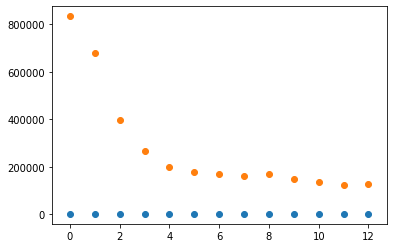

In [124]:
#Best Cross Validation Errors of Subset S
a=find_best_feature(1,[13])
b=find_best_feature(2,[13,6])
c=find_best_feature(3,[13,6,8])
d=find_best_feature(4,[13,6,8,2])
e=find_best_feature(5,[13,6,8,2,4])
f=find_best_feature(6,[13,6,8,2,4,5])
g=find_best_feature(7,[13,6,8,2,4,5,12])
h=find_best_feature(8,[13,6,8,2,4,5,12,1])
i=find_best_feature(9,[13,6,8,2,4,5,12,1,9])
j=find_best_feature(10,[13,6,8,2,4,5,12,1,9,11])
k=find_best_feature(11,[13,6,8,2,4,5,12,1,9,11,10])
l=find_best_feature(12,[13,6,8,2,4,5,12,1,9,11,10,3])
m=find_best_feature(13,[13,6,8,2,4,5,12,1,9,11,10,3,7])
a1=test_error_S(1,[13])
b1=test_error_S(2,[13,6])
c1=test_error_S(3,[13,6,8])
d1=test_error_S(4,[13,6,8,2])
e1=test_error_S(5,[13,6,8,2,4])
f1=test_error_S(6,[13,6,8,2,4,5])
g1=test_error_S(7,[13,6,8,2,4,5,12])
h1=test_error_S(8,[13,6,8,2,4,5,12,1])
i1=test_error_S(9,[13,6,8,2,4,5,12,1,9])
j1=test_error_S(10,[13,6,8,2,4,5,12,1,9,11])
k1=test_error_S(11,[13,6,8,2,4,5,12,1,9,11,10])
l1=test_error_S(12,[13,6,8,2,4,5,12,1,9,11,10,3])
m1=test_error_S(13,[13,6,8,2,4,5,12,1,9,11,10,3,7])
x = []
y=[a,b,c,d,e,f,g,h,i,j,k,l,m]
y1=[a1,b1,c1,d1,e1,f1,g1,h1,i1,j1,k1,l1,m1]
for i in range(13):
    x.append(i)
plt.scatter(x,y)
plt.scatter(x,y1)
plt.show()

In [20]:
def find_best_feature_squared(num_of_features,array_of_features):
    X1_train_feature = np.ones((N,num_of_features+1))
    X2_train_feature = np.ones((O,num_of_features+1))
    X3_train_feature = np.ones((O,num_of_features+1))
    X4_train_feature = np.ones((O,num_of_features+1))
    X5_train_feature = np.ones((O,num_of_features+1))
    
    for i in range(N):
        for j in range(len(array_of_features)):#replaces the 1s with predictor variable X squared values
            X1_train_feature[i,j+1] = (X1_train[i,array_of_features[j]])**2

    for i in range(N+1):
        for j in range(len(array_of_features)):
            X2_train_feature[i,j+1] = (X2_train[i,array_of_features[j]])**2
            X3_train_feature[i,j+1] = (X3_train[i,array_of_features[j]])**2
            X4_train_feature[i,j+1] = (X4_train[i,array_of_features[j]])**2
            X5_train_feature[i,j+1] = (X5_train[i,array_of_features[j]])**2
    for j in range (5):
        test_error = 0
        if (j==0):
            feature = np.concatenate((X2_train_feature,X3_train_feature,X4_train_feature,X5_train_feature),axis=0)
            target = np.concatenate((t_train2,t_train3,t_train4,t_train5),axis=0)
            test = X1_train_feature
            test_target = t_train1
            w = np.matmul(np.linalg.inv((np.matmul(np.transpose(feature),feature))),(np.matmul(np.transpose(feature),target)))
            y_train= (np.matmul(np.transpose(w),np.transpose(feature)))
            train_error = (1/((N+1))) * np.matmul(np.transpose(y_train-target),(y_train-target))
            y_test = np.matmul(w,np.transpose(test))
            test_error = test_error + ((1/(N+1))*(np.dot((y_test-test_target)**2,np.transpose((y_test-test_target)**2))))
        
        elif(j==1):
            feature = np.concatenate((X1_train_feature,X3_train_feature,X4_train_feature,X5_train_feature),axis=0)
            target = np.concatenate((t_train1,t_train3,t_train4,t_train5),axis=0)
            test = X2_train_feature
            test_target = t_train2
            w = np.matmul(np.linalg.inv((np.matmul(np.transpose(feature),feature))),(np.matmul(np.transpose(feature),target)))
            y_train= (np.matmul(np.transpose(w),np.transpose(feature)))
            train_error = (1/((O+1))) * np.matmul(np.transpose(y_train-target),(y_train-target))
            y_test = np.matmul(w,np.transpose(test))
            test_error = test_error + ((1/((O+1))*(np.dot((y_test-test_target)**2,np.transpose((y_test-test_target)**2)))))
        
        elif(j==2):
            feature = np.concatenate((X1_train_feature,X2_train_feature,X4_train_feature,X5_train_feature),axis=0)
            target = np.concatenate((t_train1,t_train2,t_train4,t_train5),axis=0)
            test = X3_train_feature
            test_target = t_train3
            w = np.matmul(np.linalg.inv((np.matmul(np.transpose(feature),feature))),(np.matmul(np.transpose(feature),target)))
            y_train= (np.matmul(np.transpose(w),np.transpose(feature)))
            train_error = (1/((O+1))) * np.matmul(np.transpose(y_train-target),(y_train-target))
            y_test = np.matmul(w,np.transpose(test))
            test_error = test_error + ((1/((O+1))*(np.dot((y_test-test_target)**2,np.transpose((y_test-test_target)**2)))))
            
        
        elif(j==3):
            feature = np.concatenate((X1_train_feature,X2_train_feature,X3_train_feature,X5_train_feature),axis=0)
            target = np.concatenate((t_train1,t_train2,t_train3,t_train5),axis=0)
            test = X4_train_feature
            test_target = t_train4
            w = np.matmul(np.linalg.inv((np.matmul(np.transpose(feature),feature))),(np.matmul(np.transpose(feature),target)))
            y_train= (np.matmul(np.transpose(w),np.transpose(feature)))
            train_error = (1/((O+1))) * np.matmul(np.transpose(y_train-target),(y_train-target))
            y_test = np.matmul(w,np.transpose(test))
            test_error = test_error + ((1/((O+1))*(np.dot((y_test-test_target)**2,np.transpose((y_test-test_target)**2)))))
            
        
        elif(j==4):
            feature = np.concatenate((X1_train_feature,X2_train_feature,X3_train_feature,X4_train_feature),axis=0)
            target = np.concatenate((t_train1,t_train2,t_train3,t_train4),axis=0)
            test = X5_train_feature
            test_target = t_train5
            w = np.matmul(np.linalg.inv((np.matmul(np.transpose(feature),feature))),(np.matmul(np.transpose(feature),target)))
            y_train= (np.matmul(np.transpose(w),np.transpose(feature)))
            train_error = (1/((O+1))) * np.matmul(np.transpose(y_train-target),(y_train-target))
            y_test = np.matmul(w,np.transpose(test))
            test_error = test_error + ((1/((O+1))*(np.dot((y_test-test_target)**2,np.transpose((y_test-test_target)**2)))))
    
    test_error = test_error/5
    print(test_error)
    return test_error

In [21]:
def find_best_feature_cuberoot(num_of_features,array_of_features):
    X1_train_feature = np.ones((N,num_of_features+1))
    X2_train_feature = np.ones((O,num_of_features+1))
    X3_train_feature = np.ones((O,num_of_features+1))
    X4_train_feature = np.ones((O,num_of_features+1))
    X5_train_feature = np.ones((O,num_of_features+1))
    
    for i in range(N):
        for j in range(len(array_of_features)):#replaces the 1s with predictor variable X cube rooted values
            X1_train_feature[i,j+1] = (X1_train[i,array_of_features[j]])**(1/3)

    for i in range(N+1):
        for j in range(len(array_of_features)):
            X2_train_feature[i,j+1] = (X2_train[i,array_of_features[j]])**(1/3)
            X3_train_feature[i,j+1] = (X3_train[i,array_of_features[j]])**(1/3)
            X4_train_feature[i,j+1] = (X4_train[i,array_of_features[j]])**(1/3)
            X5_train_feature[i,j+1] = (X5_train[i,array_of_features[j]])**(1/3)
    for j in range (5):
        test_error = 0
        if (j==0):
            feature = np.concatenate((X2_train_feature,X3_train_feature,X4_train_feature,X5_train_feature),axis=0)
            target = np.concatenate((t_train2,t_train3,t_train4,t_train5),axis=0)
            test = X1_train_feature
            test_target = t_train1
            w = np.matmul(np.linalg.inv((np.matmul(np.transpose(feature),feature))),(np.matmul(np.transpose(feature),target)))
            y_train= (np.matmul(np.transpose(w),np.transpose(feature)))
            train_error = (1/((N+1))) * np.matmul(np.transpose(y_train-target),(y_train-target))
            y_test = np.matmul(w,np.transpose(test))
            test_error = test_error + ((1/(N+1))*(np.dot((y_test-test_target)**2,np.transpose((y_test-test_target)**2))))
        
        elif(j==1):
            feature = np.concatenate((X1_train_feature,X3_train_feature,X4_train_feature,X5_train_feature),axis=0)
            target = np.concatenate((t_train1,t_train3,t_train4,t_train5),axis=0)
            test = X2_train_feature
            test_target = t_train2
            w = np.matmul(np.linalg.inv((np.matmul(np.transpose(feature),feature))),(np.matmul(np.transpose(feature),target)))
            y_train= (np.matmul(np.transpose(w),np.transpose(feature)))
            train_error = (1/((O+1))) * np.matmul(np.transpose(y_train-target),(y_train-target))
            y_test = np.matmul(w,np.transpose(test))
            test_error = test_error + ((1/((O+1))*(np.dot((y_test-test_target)**2,np.transpose((y_test-test_target)**2)))))
        
        elif(j==2):
            feature = np.concatenate((X1_train_feature,X2_train_feature,X4_train_feature,X5_train_feature),axis=0)
            target = np.concatenate((t_train1,t_train2,t_train4,t_train5),axis=0)
            test = X3_train_feature
            test_target = t_train3
            w = np.matmul(np.linalg.inv((np.matmul(np.transpose(feature),feature))),(np.matmul(np.transpose(feature),target)))
            y_train= (np.matmul(np.transpose(w),np.transpose(feature)))
            train_error = (1/((O+1))) * np.matmul(np.transpose(y_train-target),(y_train-target))
            y_test = np.matmul(w,np.transpose(test))
            test_error = test_error + ((1/((O+1))*(np.dot((y_test-test_target)**2,np.transpose((y_test-test_target)**2)))))
            
        
        elif(j==3):
            feature = np.concatenate((X1_train_feature,X2_train_feature,X3_train_feature,X5_train_feature),axis=0)
            target = np.concatenate((t_train1,t_train2,t_train3,t_train5),axis=0)
            test = X4_train_feature
            test_target = t_train4
            w = np.matmul(np.linalg.inv((np.matmul(np.transpose(feature),feature))),(np.matmul(np.transpose(feature),target)))
            y_train= (np.matmul(np.transpose(w),np.transpose(feature)))
            train_error = (1/((O+1))) * np.matmul(np.transpose(y_train-target),(y_train-target))
            y_test = np.matmul(w,np.transpose(test))
            test_error = test_error + ((1/((O+1))*(np.dot((y_test-test_target)**2,np.transpose((y_test-test_target)**2)))))
            
        
        elif(j==4):
            feature = np.concatenate((X1_train_feature,X2_train_feature,X3_train_feature,X4_train_feature),axis=0)
            target = np.concatenate((t_train1,t_train2,t_train3,t_train4),axis=0)
            test = X5_train_feature
            test_target = t_train5
            w = np.matmul(np.linalg.inv((np.matmul(np.transpose(feature),feature))),(np.matmul(np.transpose(feature),target)))
            y_train= (np.matmul(np.transpose(w),np.transpose(feature)))
            train_error = (1/((O+1))) * np.matmul(np.transpose(y_train-target),(y_train-target))
            y_test = np.matmul(w,np.transpose(test))
            test_error = test_error + ((1/((O+1))*(np.dot((y_test-test_target)**2,np.transpose((y_test-test_target)**2)))))
    
    test_error = test_error/5
    print(test_error)
    return test_error

In [22]:
find_best_feature_squared(1,[1])
find_best_feature_squared(1,[2])
find_best_feature_squared(1,[3])
find_best_feature_squared(1,[4])
find_best_feature_squared(1,[5])
find_best_feature_squared(1,[6])
find_best_feature_squared(1,[7])
find_best_feature_squared(1,[8])
find_best_feature_squared(1,[9])
find_best_feature_squared(1,[10])
find_best_feature_squared(1,[11])
find_best_feature_squared(1,[12])
find_best_feature_squared(1,[13])

7430.140787623556
7322.723632331433
7377.3625019558485
7042.62936811086
7145.261209747032
3205.952798920297
8456.567945314999
8402.98866919911
7376.748518454369
7061.024850022035
5077.8766962018435
6851.811370292657
3532.998637209997


3532.998637209997

In [23]:
find_best_feature_squared(2,[6,1])
find_best_feature_squared(2,[6,2])
find_best_feature_squared(2,[6,3])
find_best_feature_squared(2,[6,4])
find_best_feature_squared(2,[6,5])
find_best_feature_squared(2,[6,7])
find_best_feature_squared(2,[6,8])
find_best_feature_squared(2,[6,9])
find_best_feature_squared(2,[6,10])
find_best_feature_squared(2,[6,11])
find_best_feature_squared(2,[6,12])
find_best_feature_squared(2,[6,13])

3019.9070401565664
3153.827989639941
3423.338044854964
3036.9006595289197
3293.552834498424
3737.1855531007436
3361.5914479091452
4131.395396685344
4067.18937172175
3251.4785804848016
3179.876810601478
2079.9804786846444


2079.9804786846444

In [24]:
find_best_feature_squared(3,[6,13,1])
find_best_feature_squared(3,[6,13,2])
find_best_feature_squared(3,[6,13,3])
find_best_feature_squared(3,[6,13,4])
find_best_feature_squared(3,[6,13,5])
find_best_feature_squared(3,[6,13,7])
find_best_feature_squared(3,[6,13,8])
find_best_feature_squared(3,[6,13,9])
find_best_feature_squared(3,[6,13,10])
find_best_feature_squared(3,[6,13,11])
find_best_feature_squared(3,[6,13,12])

2040.392374443844
2089.594629247588
2281.7401567965126
1931.8819429516884
2274.3453504828767
2411.390270948105
2095.7042372432425
2679.9636911572525
2727.3879314362302
2205.7998298539223
2151.4472965902396


2151.4472965902396

In [25]:
find_best_feature_squared(4,[6,13,4,1])
find_best_feature_squared(4,[6,13,4,2])
find_best_feature_squared(4,[6,13,4,3])
find_best_feature_squared(4,[6,13,4,5])
find_best_feature_squared(4,[6,13,4,7])
find_best_feature_squared(4,[6,13,4,8])
find_best_feature_squared(4,[6,13,4,9])
find_best_feature_squared(4,[6,13,4,10])
find_best_feature_squared(4,[6,13,4,11])
find_best_feature_squared(4,[6,13,4,12])

1895.5899743129696
1911.783801165584
2066.64168686227
2057.2148281221844
2238.6086845077193
1963.7981142339145
2390.2524403439434
2412.9348981155076
1984.5254793652202
1980.2325120446997


1980.2325120446997

In [26]:
find_best_feature_squared(5,[6,13,4,1,2])
find_best_feature_squared(5,[6,13,4,1,3])
find_best_feature_squared(5,[6,13,4,1,5])
find_best_feature_squared(5,[6,13,4,1,7])
find_best_feature_squared(5,[6,13,4,1,8])
find_best_feature_squared(5,[6,13,4,1,9])
find_best_feature_squared(5,[6,13,4,1,10])
find_best_feature_squared(5,[6,13,4,1,11])
find_best_feature_squared(5,[6,13,4,1,12])

1882.313733731468
2037.8903884935949
2028.9100289359035
2194.8934151875915
1919.8372283637796
2326.0747775978757
2360.885641363625
1969.530569344691
1944.0448097572548


1944.0448097572548

In [27]:
find_best_feature_squared(6,[6,13,4,1,2,3])
find_best_feature_squared(6,[6,13,4,1,2,5])
find_best_feature_squared(6,[6,13,4,1,2,7])
find_best_feature_squared(6,[6,13,4,1,2,8])
find_best_feature_squared(6,[6,13,4,1,2,9])
find_best_feature_squared(6,[6,13,4,1,2,10])
find_best_feature_squared(6,[6,13,4,1,2,11])
find_best_feature_squared(6,[6,13,4,1,2,12])

2010.35142683324
2007.4819709751205
2109.2731356090603
1774.835569669801
2287.01408508626
2333.891971266119
1965.5765931051726
1936.6607277282455


1936.6607277282455

In [28]:
find_best_feature_squared(7,[6,13,4,1,2,8,3])
find_best_feature_squared(7,[6,13,4,1,2,8,5])
find_best_feature_squared(7,[6,13,4,1,2,8,7])
find_best_feature_squared(7,[6,13,4,1,2,8,9])
find_best_feature_squared(7,[6,13,4,1,2,8,10])
find_best_feature_squared(7,[6,13,4,1,2,8,11])
find_best_feature_squared(7,[6,13,4,1,2,8,12])

1843.724860415293
1788.8339642425206
2019.6936241982617
2133.3539498488626
2161.9358193029047
1835.804068694577
1783.9324322087596


1783.9324322087596

In [29]:
find_best_feature_squared(8,[6,13,4,1,2,8,12,3])
find_best_feature_squared(8,[6,13,4,1,2,8,12,5])
find_best_feature_squared(8,[6,13,4,1,2,8,12,7])
find_best_feature_squared(8,[6,13,4,1,2,8,12,9])
find_best_feature_squared(8,[6,13,4,1,2,8,12,10])
find_best_feature_squared(8,[6,13,4,1,2,8,12,11])

1845.8134082179513
1796.0179022069128
2021.0072281553632
2043.8054822014096
2092.8753892708437
1843.18400247129


1843.18400247129

In [30]:
find_best_feature_squared(9,[6,13,4,1,2,8,12,5,3])
find_best_feature_squared(9,[6,13,4,1,2,8,12,5,7])
find_best_feature_squared(9,[6,13,4,1,2,8,12,5,9])
find_best_feature_squared(9,[6,13,4,1,2,8,12,5,10])
find_best_feature_squared(9,[6,13,4,1,2,8,12,5,11])

1833.4660083373888
1933.4898663932286
1979.431277627197
2039.7923386507082
1900.0802232215453


1900.0802232215453

In [31]:
find_best_feature_squared(10,[6,13,4,1,2,8,12,5,3,7])
find_best_feature_squared(10,[6,13,4,1,2,8,12,5,3,9])
find_best_feature_squared(10,[6,13,4,1,2,8,12,5,3,10])
find_best_feature_squared(10,[6,13,4,1,2,8,12,5,3,11])

1944.8205709506012
1993.870426523632
2038.4482555799902
1898.4275541812035


1898.4275541812035

In [32]:
find_best_feature_squared(11,[6,13,4,1,2,8,12,5,3,11,7])
find_best_feature_squared(11,[6,13,4,1,2,8,12,5,3,11,9])
find_best_feature_squared(11,[6,13,4,1,2,8,12,5,3,11,10])

1960.7505977571939
1787.103977699103
1894.907308891728


1894.907308891728

In [33]:
find_best_feature_squared(12,[6,13,4,1,2,8,12,5,3,11,9,7])
find_best_feature_squared(12,[6,13,4,1,2,8,12,5,3,11,9,10])

1844.1639040062007
1780.0008322848935


1780.0008322848935

In [34]:
find_best_feature_squared(13,[6,13,4,1,2,8,12,5,3,11,9,10,7])

1833.9216047943416


1833.9216047943416

3205.952798920297
2079.9804786846444
1931.8819429516884
1895.5899743129696
1882.313733731468
1774.835569669801
1783.9324322087596
1796.0179022069128
1833.4660083373888
1898.4275541812035
1787.103977699103
1780.0008322848935
1833.9216047943416
4893500.015545972
681559.3371716624
409409.3885000477
376963.645799901
319924.999575447
192020.83197946232
182362.06055753955
161562.57534935305
147992.82889039183
169176.81289294336
136145.3639328283
124720.4236067809
128737.52228009225


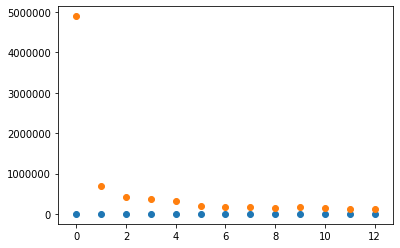

In [122]:
a=find_best_feature_squared(1,[6])
b=find_best_feature_squared(2,[6,13])
c=find_best_feature_squared(3,[6,13,4])
d=find_best_feature_squared(4,[6,13,4,1])
e=find_best_feature_squared(5,[6,13,4,1,2])
f=find_best_feature_squared(6,[6,13,4,1,2,8])
g=find_best_feature_squared(7,[6,13,4,1,2,8,12])
h=find_best_feature_squared(8,[6,13,4,1,2,8,12,5])
i=find_best_feature_squared(9,[6,13,4,1,2,8,12,5,3])
j=find_best_feature_squared(10,[6,13,4,1,2,8,12,5,3,11])
k=find_best_feature_squared(11,[6,13,4,1,2,8,12,5,3,11,9])
l=find_best_feature_squared(12,[6,13,4,1,2,8,12,5,3,11,9,10])
m=find_best_feature_squared(13,[6,13,4,1,2,8,12,5,3,11,9,10,7])
a1=test_error_S(1,[6])
b1=test_error_S(2,[6,13])
c1=test_error_S(3,[6,13,4])
d1=test_error_S(4,[6,13,4,1])
e1=test_error_S(5,[6,13,4,1,2])
f1=test_error_S(6,[6,13,4,1,2,8])
g1=test_error_S(7,[6,13,4,1,2,8,12])
h1=test_error_S(8,[6,13,4,1,2,8,12,5])
i1=test_error_S(9,[6,13,4,1,2,8,12,5,3])
j1=test_error_S(10,[6,13,4,1,2,8,12,5,3,11])
k1=test_error_S(11,[6,13,4,1,2,8,12,5,3,11,9])
l1=test_error_S(12,[6,13,4,1,2,8,12,5,3,11,9,10])
m1=test_error_S(13,[6,13,4,1,2,8,12,5,3,11,9,10,7])
x = []
y=[a,b,c,d,e,f,g,h,i,j,k,l,m]
y1=[a1,b1,c1,d1,e1,f1,g1,h1,i1,j1,k1,l1,m1]
for i in range(13):
    x.append(i)
plt.scatter(x,y)
plt.scatter(x,y1)
plt.show()

In [36]:
find_best_feature_cuberoot(1,[1])
find_best_feature_cuberoot(1,[2])
find_best_feature_cuberoot(1,[3])
find_best_feature_cuberoot(1,[4])
find_best_feature_cuberoot(1,[5])
find_best_feature_cuberoot(1,[6])
find_best_feature_cuberoot(1,[7])
find_best_feature_cuberoot(1,[8])
find_best_feature_cuberoot(1,[9])
find_best_feature_cuberoot(1,[10])
find_best_feature_cuberoot(1,[11])
find_best_feature_cuberoot(1,[12])
find_best_feature_cuberoot(1,[13])

7091.668944333507
7174.3164744050155
7097.110648949021
7042.62936811086
7501.600489765532
3822.7056371993217
8240.513818519416
9000.932402656992
7573.594173873578
6976.797087785593
5124.526874924552
6890.385025734608
1257.430180052893


1257.430180052893

In [37]:
find_best_feature_cuberoot(2,[13,1])
find_best_feature_cuberoot(2,[13,2])
find_best_feature_cuberoot(2,[13,3])
find_best_feature_cuberoot(2,[13,4])
find_best_feature_cuberoot(2,[13,5])
find_best_feature_cuberoot(2,[13,6])
find_best_feature_cuberoot(2,[13,7])
find_best_feature_cuberoot(2,[13,8])
find_best_feature_cuberoot(2,[13,9])
find_best_feature_cuberoot(2,[13,10])
find_best_feature_cuberoot(2,[13,11])
find_best_feature_cuberoot(2,[13,12])


1271.8555795053276
1261.8754349113672
1282.237783969618
1163.6634376097875
1160.468400666839
1074.0232875427175
1051.7532222096331
876.1712331052024
1245.001483149383
1321.7401797349899
1163.656482534089
1260.3416432882361


1260.3416432882361

In [38]:
find_best_feature_cuberoot(3,[13,8,1])
find_best_feature_cuberoot(3,[13,8,2])
find_best_feature_cuberoot(3,[13,8,3])
find_best_feature_cuberoot(3,[13,8,4])
find_best_feature_cuberoot(3,[13,8,5])
find_best_feature_cuberoot(3,[13,8,6])
find_best_feature_cuberoot(3,[13,8,7])
find_best_feature_cuberoot(3,[13,8,9])
find_best_feature_cuberoot(3,[13,8,10])
find_best_feature_cuberoot(3,[13,8,11])
find_best_feature_cuberoot(3,[13,8,12])

865.6386200816341
780.1294143175824
743.557617840212
866.2273182596709
825.6347306221272
765.7357416463885
881.3717210740384
874.5844374121904
814.7626100386663
761.6186873749322
847.0222039492694


847.0222039492694

In [39]:
find_best_feature_cuberoot(4,[13,8,3,1])
find_best_feature_cuberoot(4,[13,8,3,2])
find_best_feature_cuberoot(4,[13,8,3,4])
find_best_feature_cuberoot(4,[13,8,3,5])
find_best_feature_cuberoot(4,[13,8,3,6])
find_best_feature_cuberoot(4,[13,8,3,7])
find_best_feature_cuberoot(4,[13,8,3,9])
find_best_feature_cuberoot(4,[13,8,3,10])
find_best_feature_cuberoot(4,[13,8,3,11])
find_best_feature_cuberoot(4,[13,8,3,12])

761.3012681582076
707.1463668342224
699.2295417243338
724.3885384789886
703.9211907451515
745.1236913238138
747.0142873003113
747.3277356567704
712.2141108991059
726.6865295395764


726.6865295395764

In [40]:
find_best_feature_cuberoot(5,[13,8,3,4,1])
find_best_feature_cuberoot(5,[13,8,3,4,2])
find_best_feature_cuberoot(5,[13,8,3,4,5])
find_best_feature_cuberoot(5,[13,8,3,4,6])
find_best_feature_cuberoot(5,[13,8,3,4,7])
find_best_feature_cuberoot(5,[13,8,3,4,9])
find_best_feature_cuberoot(5,[13,8,3,4,10])
find_best_feature_cuberoot(5,[13,8,3,4,11])
find_best_feature_cuberoot(5,[13,8,3,4,12])

711.8454095201647
667.4528215369285
678.6048040468438
656.9441913560867
700.4513663472065
700.5679653560101
695.9646592565707
667.9100257649733
685.2772791848545


685.2772791848545

In [41]:
find_best_feature_cuberoot(6,[13,8,3,4,6,1])
find_best_feature_cuberoot(6,[13,8,3,4,6,2])
find_best_feature_cuberoot(6,[13,8,3,4,6,5])
find_best_feature_cuberoot(6,[13,8,3,4,6,7])
find_best_feature_cuberoot(6,[13,8,3,4,6,9])
find_best_feature_cuberoot(6,[13,8,3,4,6,10])
find_best_feature_cuberoot(6,[13,8,3,4,6,11])
find_best_feature_cuberoot(6,[13,8,3,4,6,12])

678.8255944693402
630.9351681056854
620.7106215682575
657.0968761396977
670.7897868329426
678.9957388151486
667.4594704623801
648.2731118631193


648.2731118631193

In [42]:
find_best_feature_cuberoot(7,[13,8,3,4,6,5,1])
find_best_feature_cuberoot(7,[13,8,3,4,6,5,2])
find_best_feature_cuberoot(7,[13,8,3,4,6,5,7])
find_best_feature_cuberoot(7,[13,8,3,4,6,5,9])
find_best_feature_cuberoot(7,[13,8,3,4,6,5,10])
find_best_feature_cuberoot(7,[13,8,3,4,6,5,11])
find_best_feature_cuberoot(7,[13,8,3,4,6,5,12])

640.5071404421676
588.5086412802868
619.5823901417618
624.6631683016874
642.0961375917203
607.2248338591794
616.8621358048615


616.8621358048615

In [43]:
find_best_feature_cuberoot(8,[13,8,3,4,6,5,2,1])
find_best_feature_cuberoot(8,[13,8,3,4,6,5,2,7])
find_best_feature_cuberoot(8,[13,8,3,4,6,5,2,9])
find_best_feature_cuberoot(8,[13,8,3,4,6,5,2,10])
find_best_feature_cuberoot(8,[13,8,3,4,6,5,2,11])
find_best_feature_cuberoot(8,[13,8,3,4,6,5,2,12])

605.267860397091
585.5956566319835
594.6701638704905
607.080351285088
600.3320960590302
583.4631940729107


583.4631940729107

In [44]:
find_best_feature_cuberoot(9,[13,8,3,4,6,5,2,12,1])
find_best_feature_cuberoot(9,[13,8,3,4,6,5,2,12,7])
find_best_feature_cuberoot(9,[13,8,3,4,6,5,2,12,9])
find_best_feature_cuberoot(9,[13,8,3,4,6,5,2,12,10])
find_best_feature_cuberoot(9,[13,8,3,4,6,5,2,12,11])

591.4811782975174
581.1540372544658
579.3076090079949
598.1409142058444
598.5961633649795


598.5961633649795

In [45]:
find_best_feature_cuberoot(10,[13,8,3,4,6,5,2,12,9,1])
find_best_feature_cuberoot(10,[13,8,3,4,6,5,2,12,9,7])
find_best_feature_cuberoot(10,[13,8,3,4,6,5,2,12,9,10])
find_best_feature_cuberoot(10,[13,8,3,4,6,5,2,12,9,11])

569.6791728448926
576.674207015626
560.4429721595847
542.5301852514718


542.5301852514718

In [46]:
find_best_feature_cuberoot(11,[13,8,3,4,6,5,2,12,9,11,1])
find_best_feature_cuberoot(11,[13,8,3,4,6,5,2,12,9,11,7])
find_best_feature_cuberoot(11,[13,8,3,4,6,5,2,12,9,11,10])

530.3859808146523
538.444594408078
534.3526228176547


534.3526228176547

In [47]:
find_best_feature_cuberoot(12,[13,8,3,4,6,5,2,12,9,11,1,7])
find_best_feature_cuberoot(12,[13,8,3,4,6,5,2,12,9,11,1,10])

526.9668270517121
525.6709633477863


525.6709633477863

In [48]:
find_best_feature_cuberoot(13,[13,8,3,4,6,5,2,12,9,11,1,10,7])

521.9397484591861


521.9397484591861

1257.430180052893
876.1712331052024
743.557617840212
699.2295417243338
656.9441913560867
620.7106215682575
588.5086412802868
583.4631940729107
579.3076090079949
542.5301852514718
530.3859808146523
525.6709633477863
521.9397484591861
834478.3792145918
324811.1049498525
207262.30877814037
131973.60397913202
243074.83270883356
210571.1742095321
158452.4994808683
151836.64924173747
175656.48021930785
154936.2904854015
136145.3639329133
124720.42360675697
128737.52228020634


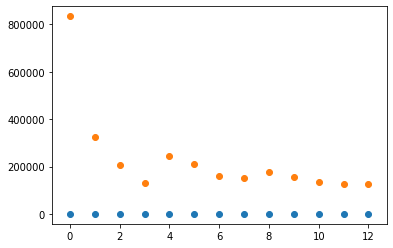

In [120]:
a=find_best_feature_cuberoot(1,[13])
b=find_best_feature_cuberoot(2,[13,8])
c=find_best_feature_cuberoot(3,[13,8,3])
d=find_best_feature_cuberoot(4,[13,8,3,4])
e=find_best_feature_cuberoot(5,[13,8,3,4,6])
f=find_best_feature_cuberoot(6,[13,8,3,4,6,5])
g=find_best_feature_cuberoot(7,[13,8,3,4,6,5,2])
h=find_best_feature_cuberoot(8,[13,8,3,4,6,5,2,12])
i=find_best_feature_cuberoot(9,[13,8,3,4,6,5,2,12,9])
j=find_best_feature_cuberoot(10,[13,8,3,4,6,5,2,12,9,11])
k=find_best_feature_cuberoot(11,[13,8,3,4,6,5,2,12,9,11,1])
l=find_best_feature_cuberoot(12,[13,8,3,4,6,5,2,12,9,11,1,10])
m=find_best_feature_cuberoot(13,[13,8,3,4,6,5,2,12,9,11,1,10,7])
a1=test_error_S(1,[13])
b1=test_error_S(2,[13,8])
c1=test_error_S(3,[13,8,3])
d1=test_error_S(4,[13,8,3,4])
e1=test_error_S(5,[13,8,3,4,6])
f1=test_error_S(6,[13,8,3,4,6,5])
g1=test_error_S(7,[13,8,3,4,6,5,2])
h1=test_error_S(8,[13,8,3,4,6,5,2,12])
i1=test_error_S(9,[13,8,3,4,6,5,2,12,9])
j1=test_error_S(10,[13,8,3,4,6,5,2,12,9,11])
k1=test_error_S(11,[13,8,3,4,6,5,2,12,9,11,1])
l1=test_error_S(12,[13,8,3,4,6,5,2,12,9,11,1,10])
m1=test_error_S(13,[13,8,3,4,6,5,2,12,9,11,1,10,7])
x = []
y=[a,b,c,d,e,f,g,h,i,j,k,l,m]
y1=[a1,b1,c1,d1,e1,f1,g1,h1,i1,j1,k1,l1,m1]
for i in range(13):
    x.append(i)
plt.scatter(x,y)
plt.scatter(x,y1)
plt.show()